# Installation à faire 

***pip install -r requirement.txt***


## Variables globales (à executer avant)

In [ ]:
import pandas as pd
import machine_learning as ml


df = None # Dataframe contenant les données
X = None # données relatives aux attributs
y = None # données relatives à la variable cible (classe)
X_train = None # données d'apprentissage (attributs)
y_train = None #données d'apprentissage (cible)
X_test = None # données de test (attributs)
y_test = None # données de test (cible)
active_feature_index = []
cible_index = -1

model = None #Par abus de langage, il s'agit de l'algorithme de ML qui servira pour la création d'un modèle (cas supervisé)

cluster = None #


# I - Chargement et manipulation des données


## I-1 Chargement des données

In [12]:
# Chargement de données
filename=input("Spécifier le fichier des données: ")
try:
    df=ml.charger_donnees(filename)
    nbraw, nbcol = df.shape
    print("=======================")
    print("les données ont été correctement chargées.\nNombre d'attributs : {}\nNombre d'individus : {}\n ".format(nbcol,nbraw))
except Exception as ex:
    print(ex.args[0])

Spécifier le fichier des données: noisiness.txt
separateur de fichier:
0(tabulation)
1:(virgule)
2:(point virgule)
0
les données ont été correctement chargées.
Nombre d'attributs : 11
Nombre d'individus : 533
 


In [4]:
df.head()

,ERB,Fc,rl,rA,rI,Plin,Ln,NOS,LTL,SPL,MOS_LQO
0,15.9149,11.9396,0.0,0.0,0,45.0571,46.9026,12.1772,55.221,84.09,1.6783
1,19.7595,11.9719,0.0,0.0,0,30.8186,34.0816,10.3748,57.795,81.05,2.4077
2,21.7021,12.0316,0.0,0.0,0,18.0230,19.5889,7.3934,55.180,79.12,2.5909
3,22.2886,12.0397,0.0,0.0,0,8.6963,10.3757,4.2841,53.470,78.77,3.3238
4,22.2790,12.0420,0.0,0.0,0,4.6881,4.8154,2.2725,53.032,78.75,3.5694


## I-2 Extraction des attributs et variable cible

In [13]:
try:
    if df is None:
        raise Exception("Aucune données n'a été chargée! Merci de charger les données dans la première cellule")
    cible_index,active_feature_index, X, y = ml.extract(df)
    print("=======================")
    print("Attributs : ", list(df.columns[active_feature_index]))
    if cible_index >= 0:
        print("Variable cible : ", df.columns[cible_index])
        print("Repartition des individus par classe")
        ml.display_classes_stats(df, cible_index )
    else:
        print("Pas de variable cible ")
        
except Exception as ex:
    print(ex.args[0])

Information sur les attributs
 ERB : 0
 Fc : 1
 rl : 2
 rA : 3
 rI : 4
 Plin : 5
 Ln : 6
 NOS : 7
 LTL : 8
 SPL : 9
 MOS_LQO : 10
Choisir l'index de la variable cible : 
NB : Dans le cas d'un apprentissage non supervisé, laisser ce champ vide
10
Sélectionner les indices des attributs (séparer par une virgule ex. 1,4,5,8)
Pour sélectionner plusieurs, utiliser ':' (ex. 0:7): 0:9
Attributs :  [' ERB', ' Fc', ' rl', ' rA', ' rI', ' Plin', ' Ln', ' NOS', ' LTL', ' SPL']
Variable cible :   MOS_LQO
Repartition des individus par classe
2.2530    15
2.3937     6
1.8668     6
2.5286     5
1.7664     5
          ..
3.4039     1
3.1017     1
2.5375     1
3.5744     1
2.5304     1
Name:  MOS_LQO, Length: 431, dtype: int64


## I-3 Normalisation des données

In [ ]:
try:
    if X is None:
        raise Exception("Merci d'extraire les données relatives aux attributs (cf. section I.2)")
    
    try :
        norm_type = int(input("Choisir l'algorithme de normalisation :\n0:standard\n1:MinMax\n-1 : pas de normalisation\n (par défaut: standard)\n"))
    except :
        norm_type = 0
    
    print("=========================")
    if norm_type >= 0:
        X = ml.normaliser(X, norm_type)
        print("la normalisation a été correctement effectuée !!")
    else :
        print("Pas de normalisation des données !!")
    
    
except Exception as ex:
    print(ex.args[0])    

## I-4 Séparation des données en test et apprentissage (Uniquement pour l'apprentissage supervisé)

In [14]:
try:  
    if X is None:
        raise Exception("Pas de données disponible !!!")
    if cible_index == -1:
        raise Exception("Aucune classe n'a été définie. Vous êtes peut être dans le cas d'un apprentissage non supervisé")
    train_size = 0
    while not 0 < train_size <= 1 :
        train_size = float(input("Spécifier la proportion de données pour l'apprentissage (entre 0 et 1) : "))

  
    X_train, X_test, Y_train, Y_test = ml.split_train_test_data(X, y, train_size=train_size)
    print("==========================")
    print("Proportion des données d'apprentissage : ", len(X_train))
    print("Proportion des données de test : ", len(X_test))
except Exception as ex:
    print(ex.args[0])


Spécifier la proportion de données pour l'apprentissage (entre 0 et 1) : 0.8
Proportion des données d'apprentissage :  426
Proportion des données de test :  107


# II Construction du modèle (Apprentissage supervisé)

## II-1 Choix du modèle et type de prédiction(Classification ou régression)

In [19]:
try:
    if cible_index == -1:
        raise Exception("Aucune classe n'a été définie. Vous êtes peut être dans le cas d'un apprentissage non supervisé")
        
    methode_ml = int(input("Choisir l'algorithme de machine learning :\n0 : CART\n1 : Foret aleatoire\n2 : Bagging\n3 : Boosting)\n4 : SVM\n"))
    type_prediction = input("Sélection le type de prédiction :\n0 : classification\n1 : régression\nNB : laisser ce champ vide si non définie (par defaut = Classification)\n ")

    try:
        type_prediction = int(type_prediction)
    except:
        type_prediction = 0

    model = ml.build_model(methode_ml, type_prediction)

    print("=========================")
    model.afficher_parametres()

        #model.apprendre(X_train, Y_train)
except Exception as ex:
    print(ex.args[0])


Choisir l'algorithme de machine learning :
0 : CART
1 : Foret aleatoire
2 : Bagging
3 : Boosting)
4 : SVM
0
Sélection le type de prédiction :
0 : classification
1 : régression
NB : laisser ce champ vide si non définie (par defaut = Classification)
 1
Selectionner le critére:
0: mse (EQM)
1: mae (Erreur Moyenne Absolue) (default = mse)
0
Specifier la profondeur maximale de l'arbre
NB : laisser ce champ vide si non définie
5
Méthode de ML :  Cart - Regressor
Fonction de mesure d'impureté :  mse
Profondeur maximale : 5


## II-2 Construction du modèle et performances

In [26]:
try :
    if model is None :
        raise Exception("Aucun algorithme ML n'a été sélectionné !!!")
    if cible_index == -1:
            raise Exception("Aucune classe n'a été définie. Vous êtes peut être dans le cas d'un apprentissage non supervisé")
    try:
        print("Apprentissage en cours ...")
        model.apprendre(X_train, Y_train, df.columns[active_feature_index])
    except Exception as ex:
        print(ex.args[0])
    
    print("Evaluation de performance ...")
    model.afficher_performance(X_test, Y_test)
except Exception as ex:
    print(ex.args[0])

Apprentissage en cours ...
Evaluation de performance ...
coefficient de détermination(R^2) :  0.8835704248525872
erreur quadratique moyenne (EQM) :  0.05230711193246297


### Options avancées 1 : Affichage des paramètres du modèle

Quelle option souhaiteriez-vous afficher ?
0 : Afficher le modèle
1 : Afficher la règle de décision
2 : Afficher l'importance des variables
 (defaut = Afficher le modèle)

Saisir la hauteur du graphe (par defaut = 10)

Saisir la largeur du graphe (par defaut = 10)
5
patienter ... (pour afficher le graphe, il est préférable de ne pas continuer (option = Non)
Voulez vous continuer ?
0 : Non
1 : Oui (defaut = Oui)0


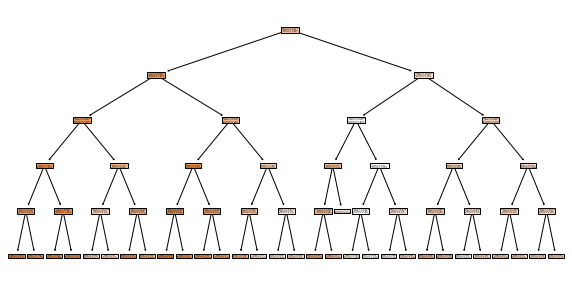

In [31]:
try:
    if model is None:
        raise Exception("Aucun modèle n'a été crée !!!")
    model.afficher_options_avancee_modele()
except Exception as ex:
    print(ex.args[0])
    

### Options avancées 2 : Sélection de variables (Backward and Forward selection)

Comme nous l'avons vu dans le cours, les méthodes de sélection de variables permettent de mettre en exergue l'importance des attributs ayant contribués à la construction du modèle. La plupart des algorithmes d'apprentissage supervisé intègre ces algorithmes. Toutefois il existe 2 méthodes externes : Backward selection et Forward selection

**Forward Selection** : c'est une méthode qui commence par un modèle vide et ajoute les variables (attributs) une par une. À chaque étape, on ajoute la seule variable qui donne la meilleure amélioration à votre modèle

**Backward Selection** : Elle est l'opposé de la précedente. On commence avec un modèle qui inclut toutes les variables et on élimine les variables superflues une par une.


In [ ]:
try:
    if model is None:
        raise Exception("Aucun modèle n'a été crée !!!")
    if X is None or y is None:
        raise Exception("Aucune donnée n'a été chargée")
    
    results = ml.feature_selection(model, X_train, Y_train, df.columns[active_feature_index])
    print(results)
except Exception as ex:
    print(ex.args[0])

In [ ]:
results[["feature_names", "avg_score"]]

## II-3 Validation croisée

In [21]:
try:
    if model is None:
        raise Exception("Aucun modèle n'a été crée !!!")
    if X is None or y is None:
        raise Exception("Aucune donnée n'a été chargée")
    
    cv = input("Spécifier la valeur de CV : (defaut = 5)\n")
    try:
        cv = int(cv)
    except :
        cv = 5
    scores,mean_scores,var_scores = model.validation_croise(X, y, cv)
    
    print("=========================")
    print("Moyenne des scores : %0.3f" %mean_scores)
    print("variance des scores : %0.5f" %var_scores)
    print("Score par étape de validation :", scores)
    
except Exception as ex:
    print(ex.args[0])

Spécifier la valeur de CV : (defaut = 5)

Moyenne des scores : 0.871
variance des scores : 0.00147
Score par étape de validation : [0.8906828  0.81915982 0.90095241 0.91281161 0.8306895 ]


## II-4 Recherche de paramètres optimum de modèle

In [18]:
try:
    if model is None:
        raise Exception("Aucun modèle n'a été crée !!!")
    if X is None or y is None:
        raise Exception("Aucune donnée n'a été chargée")
    
    best_params, best_score = model.recherche_optimum()
    
    print("=========================")
    print("Résultats des paramètres optimum pour l'algorithme ML ", model.nom)
    print("Les meilleurs paramètres sont %s" % best_params)
    print("Score : %0.2f"  %best_score)
    
except Exception as ex:
    print(ex.args[0])

spécifier les valeurs de max_depth : (séparer les valeurs par une virgule ex. 1,7,4,5,8)
Pour sélectionner plusieurs, utiliser 'debut:fin:pas' (ex. 0:7:0.1)1:5:1
====Paramètres à optimiser=======================
algorithme ML :  Cart - Regressor
{'criterion': ['mse', 'mae'], 'max_depth': [1, 2, 3, 4, 5]}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Résultats des paramètres optimum pour l'algorithme ML  Cart - Regressor
Les meilleurs paramètres sont {'criterion': 'mse', 'max_depth': 5}
Score : 0.86


In [ ]:
Résultats des paramètres optimum pour l'algorithme ML  Cart - Regressor
Les meilleurs paramètres sont {'criterion': 'mse', 'max_depth': 5}
Score : 0.87

## II-5 Export du modèle

In [ ]:
try:
    if model is None:
        raise Exception("Aucun modèle n'a été crée !!!")
    if X is None or y is None:
        raise Exception("Aucune donnée n'a été chargée")
        
    model_filename = input("Spécifier le fichier des données: ")
    model.exporter_modele(model_filename)
    print("Le modèle a été correctement exporté")
except Exception as ex:
    print(ex.args[0])

# III. Clustering (Kmeans)

**Kmeans** est une méthode d'apprentissage non supervisé permettant de regrouper en **K clusters** distinct des observations d’un jeu de données. Le critère permettant de repartir les individus par groupe est **l'inertie intra classe (ou groupe)**, chaque groupe étant mené par un barycentre. Lors de la construction des clusters, le barycentre est constamment mis à jour d'où l'appelation de **méthode des centres (barycentres) mobiles**

Deux critères majeures :
- Le choix des barycentres de départ
- Le choix du nombre optimal de cluster


**1. Choix des barycentre de départ**
 - On peut choisir de sélectionner aléatoirement des individus comme centroid (**random**)
 - la méthode **k-means++** utilisant une approche plus efficace de sélection des centroids : choisir les centres l’un après l’autre, suivant une loi non uniforme qui évolue après le choix de chaque centre et qui privilégie les candidats éloignés des centres déjà sélectionnés


**2. Choix du nombre optimal de cluster**

La méthode du « coude » . La valeur retenue pour k est celle qui marque le début d’un pallier : pour des valeurs inférieures la qualité de regroupement est nettement moins bonne, alors que pour des valeurs supérieures la qualité ne s’améliore pas sensiblement. Noter toutefois que si la plage de valeurs de k explorées est suffisamment large il est fréquent d’y trouver plusieurs « coudes ».
 

## II.1. Choix du nombre optimal de classes (K)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

try:
    
    try:
        max_clusters = int(input("spécifier les valeurs de K : (séparer les valeurs par une virgule ex. 1,7,4,5,8)\nPour "
                "sélectionner plusieurs, utiliser 'debut:fin:pas' (ex. 1:20:1)"))
    except:
        max_clusters = 10
    wcss = []
    for i in range(1, max_clusters):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.title("Nombre optimal de cluster")
    plt.xlabel("Nombre de cluster")
    plt.plot(list(range(1, max_clusters)),wcss)
    plt.show()
            
except:
    print(ex.args[0])                            
    


## III.2. Construction des clusters

In [ ]:
labels = []

try:
    if X is None :
        raise Exception("Aucune donnée n'a été chargée. Merci de charger les données  (cf. I)")
    
    try:
        n_clusters = int(input("Spécifier le nombre de cluster (K) que vous souhaiteriez avoir \n(defaut=4)\n"))
    except:
        n_clusters = 4

    try:
        init = int(input("Sélectionner l'approche d'initialisation des centroids : \n0 : k-means++\n1 : random\n (par défaut =k-means++)\n"))
    except:
        init = 0
    init = "random" if init else "k-means++"
    
    kmeans = KMeans(n_clusters=n_clusters,  init=init, random_state=0)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    
    
except Exception as ex:
    print(ex.args[0])
    